In [13]:
import pandas as pd
data= pd.read_csv(
    "winequalityN.csv")
threshold = data['quality'].max()/2+1  # Define your threshold

data['quality'] = (data['quality'] > threshold).astype(int)
data['type'] = data['type'].apply(lambda x: 0 if x=='white' else 1)
counts = data['quality'].value_counts()
target_count = min(counts)
balanced_data = pd.concat([
    data[data['quality'] == 0].sample(target_count, replace=True),
    data[data['quality'] == 1].sample(target_count, replace=True)
])
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)
balanced_data['quality'].value_counts()
#data = balanced_data
features = data.copy()
features.fillna(0, inplace=True)
labels = features.pop('quality')
import numpy as np
features = np.array(features)
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=0)
for train_index, test_index in sss.split(features,labels):
    X_train, X_test = features[train_index],features[test_index]
    y_train, y_test = labels[train_index],labels[test_index]
from sklearn.ensemble import RandomForestClassifier

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
#[('ccp_alpha', 0), ('criterion', 'gini'), ('splitter', 'random')]
parameters={'criterion':('gini','entropy','log_loss'),
            'bootstrap':(True,False),
            'oob_score':(True,False)}

In [16]:
clf = GridSearchCV(RandomForestClassifier(), parameters)
import warnings
warnings.filterwarnings("ignore")
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': (True, False),
                         'criterion': ('gini', 'entropy', 'log_loss'),
                         'oob_score': (True, False)})

In [17]:
predictions = clf.predict(X_test)
predictions_train = clf.predict(X_train)

In [18]:
import sklearn
sklearn.metrics.roc_curve(y_test,predictions)

(array([0.       , 0.2849162, 1.       ]),
 array([0.        , 0.88411669, 1.        ]),
 array([inf,  1.,  0.]))

In [19]:
sklearn.metrics.roc_auc_score(y_test,predictions)

0.799600246280887

In [20]:
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[ 512,  204],
       [ 143, 1091]], dtype=int64)

In [21]:
sklearn.metrics.log_loss(y_test,predictions)

6.413921910781361

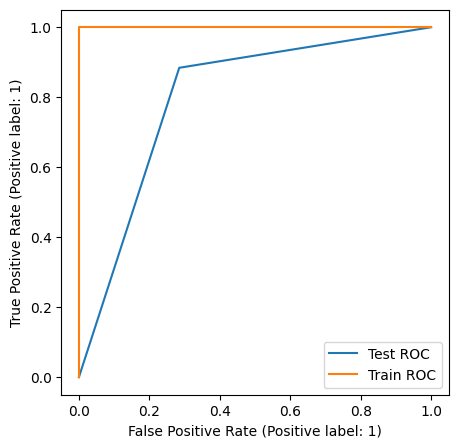

In [22]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
RocCurveDisplay.from_predictions(y_test,predictions, ax=ax, label='Test ROC')
RocCurveDisplay.from_predictions(y_train,predictions_train, ax=ax, label='Train ROC')

In [23]:
sklearn.metrics.f1_score(y_test,predictions,average=None)

array([0.74690007, 0.86279162])

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.8220512820512821
